In [19]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem.Draw import rdMolDraw2D
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.molSize = 800, 800
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [20]:
molecule = Chem.AddHs(Chem.MolFromSmiles("CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5"))

In [21]:
AllChem.ComputeGasteigerCharges(molecule)

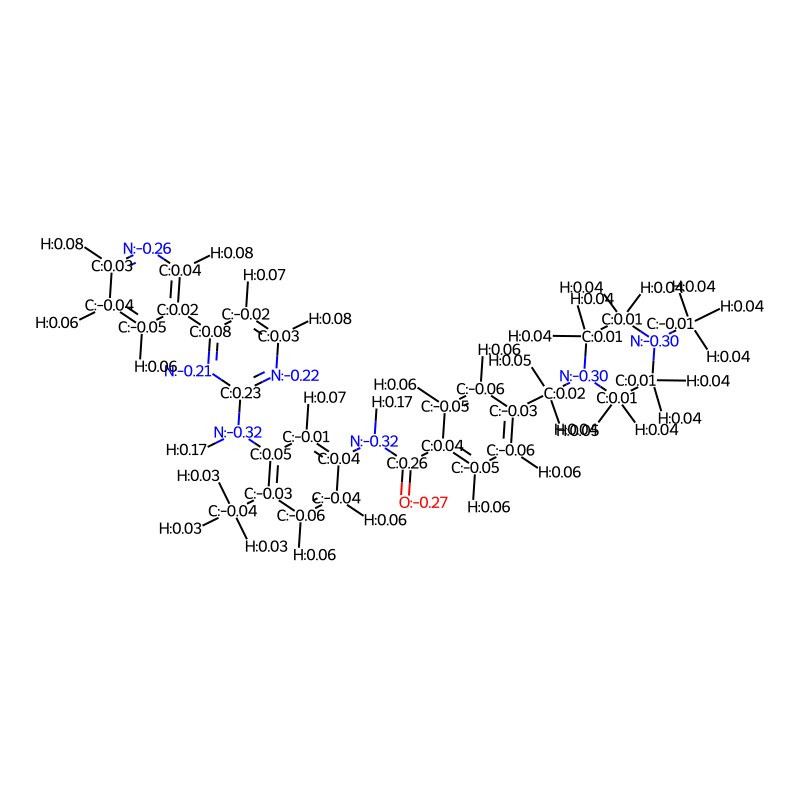

In [22]:
m2 = Chem.Mol(molecule)
for at in m2.GetAtoms():
    lbl = '%s:%.2f'%(at.GetSymbol(),at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomLabel',lbl)
m2

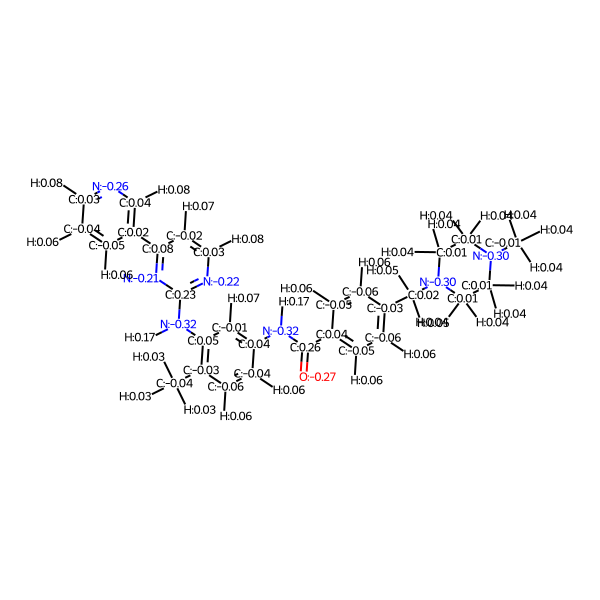

In [23]:
d2d = rdMolDraw2D.MolDraw2DSVG(600,600)
# the labels end up being a bit big. It helps to scale them down
d2d.SetFontSize(6)
dm = rdMolDraw2D.PrepareMolForDrawing(molecule)
dopts = d2d.drawOptions()
for i,at in enumerate(molecule.GetAtoms()):
    dopts.atomLabels[i] = '%s:%.2f'%(at.GetSymbol(),at.GetDoubleProp("_GasteigerCharge"))
d2d.DrawMolecule(dm)
d2d.FinishDrawing()
svg = d2d.GetDrawingText()
from IPython.display import SVG
SVG(svg)

In [24]:
import collections
from collections import Counter
from pathlib import Path
import operator
import time
import math

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, cluster

from rdkit import RDConfig, Chem, Geometry, DistanceGeometry
from rdkit.Chem import (
    ChemicalFeatures,
    rdDistGeom,
    Draw,
    rdMolTransforms,
    AllChem,
)
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem.Pharm3D import Pharmacophore, EmbedLib
from rdkit.Numerics import rdAlignment
import nglview as nv

In [25]:
# We need to add hydrogens to the ligand skeleton and create an embedded molecule instance.
AllChem.EmbedMolecule(molecule)
view = nv.show_rdkit(molecule)
view

NGLWidget()

In [26]:
import os

In [27]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')

In [28]:
feature_factory = AllChem.BuildFeatureFactory(str(Path(RDConfig.RDDataDir) / "BaseFeatures.fdef"))


In [34]:
list(feature_factory.GetFeatureDefs().keys())

['Donor.SingleAtomDonor',
 'Acceptor.SingleAtomAcceptor',
 'NegIonizable.AcidicGroup',
 'PosIonizable.BasicGroup',
 'PosIonizable.PosN',
 'PosIonizable.Imidazole',
 'PosIonizable.Guanidine',
 'ZnBinder.ZnBinder1',
 'ZnBinder.ZnBinder2',
 'ZnBinder.ZnBinder3',
 'ZnBinder.ZnBinder4',
 'ZnBinder.ZnBinder5',
 'ZnBinder.ZnBinder6',
 'Aromatic.Arom4',
 'Aromatic.Arom5',
 'Aromatic.Arom6',
 'Aromatic.Arom7',
 'Aromatic.Arom8',
 'Hydrophobe.ThreeWayAttach',
 'Hydrophobe.ChainTwoWayAttach',
 'LumpedHydrophobe.Nitro2',
 'LumpedHydrophobe.RH6_6',
 'LumpedHydrophobe.RH5_5',
 'LumpedHydrophobe.RH4_4',
 'LumpedHydrophobe.RH3_3',
 'LumpedHydrophobe.tButyl',
 'LumpedHydrophobe.iPropyl']

In [30]:
features = feature_factory.GetFeaturesForMol(molecule)
print(f"Number of features found: {len(features)}")

Number of features found: 31


In [35]:
feature_frequency = collections.Counter([feature.GetFamily() for feature in features])
feature_frequency

Counter({'Donor': 4,
         'Acceptor': 4,
         'PosIonizable': 2,
         'Aromatic': 4,
         'Hydrophobe': 15,
         'LumpedHydrophobe': 2})